<a href="https://colab.research.google.com/github/TabasomJebreili/handwashing-impact-analysis/blob/main/Dr_Semmelweis_Handwashing_Discovery_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This project analyzes historical medical data from the Vienna General Hospital (1841–1849), where physician Ignaz Semmelweis investigated the high mortality rates caused by puerperal (childbed) fever in maternity wards.The goal is to reproduce and validate Semmelweis’s discovery — that improved hygiene practices, particularly handwashing, significantly reduced patient deaths.

### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).


In [ ]:
#%pip install --upgrade plotly

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [ ]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
df_monthly = pd.read_csv('monthly_deaths.csv',
                      parse_dates=['date'])

# Preliminary Data Exploration


In [ ]:
df_yearly.isna().values.any()

np.False_

In [ ]:
df_yearly.duplicated().values.any()

np.False_

In [ ]:
df_monthly.duplicated().values.any()

np.False_

In [ ]:
df_monthly.isna().values.any()

np.False_

In [ ]:
df_monthly.sample()

,date,births,deaths
94,1848-12-01,373,5


In [ ]:
df_yearly.sample()

,year,births,deaths,clinic
11,1846,3754,105,clinic 2


### Descriptive Statistics

In [ ]:
df_monthly.describe()

,date,births,deaths
count,98,98.00,98.00
mean,1845-02-11 04:24:29.387755008,267.00,22.47
min,1841-01-01 00:00:00,190.00,0.00
25%,1843-02-08 00:00:00,242.50,8.00
50%,1845-02-15 00:00:00,264.00,16.50
75%,1847-02-22 00:00:00,292.75,36.75
max,1849-03-01 00:00:00,406.00,75.00
std,NaN,41.77,18.14


### Percentage of Women Dying in Childbirth


In [ ]:
df_yearly.sort_values("year", inplace=True)
df_yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2
3,1844,3157,260,clinic 1
10,1845,3241,66,clinic 2
4,1845,3492,241,clinic 1


In [ ]:
df_1840s = df_yearly[(df_yearly.year // 10 * 10) == 1840 ]

In [ ]:
(df_1840s.deaths.sum() / df_1840s.births.sum()) * 100

np.float64(7.083762852536147)

# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

In [ ]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

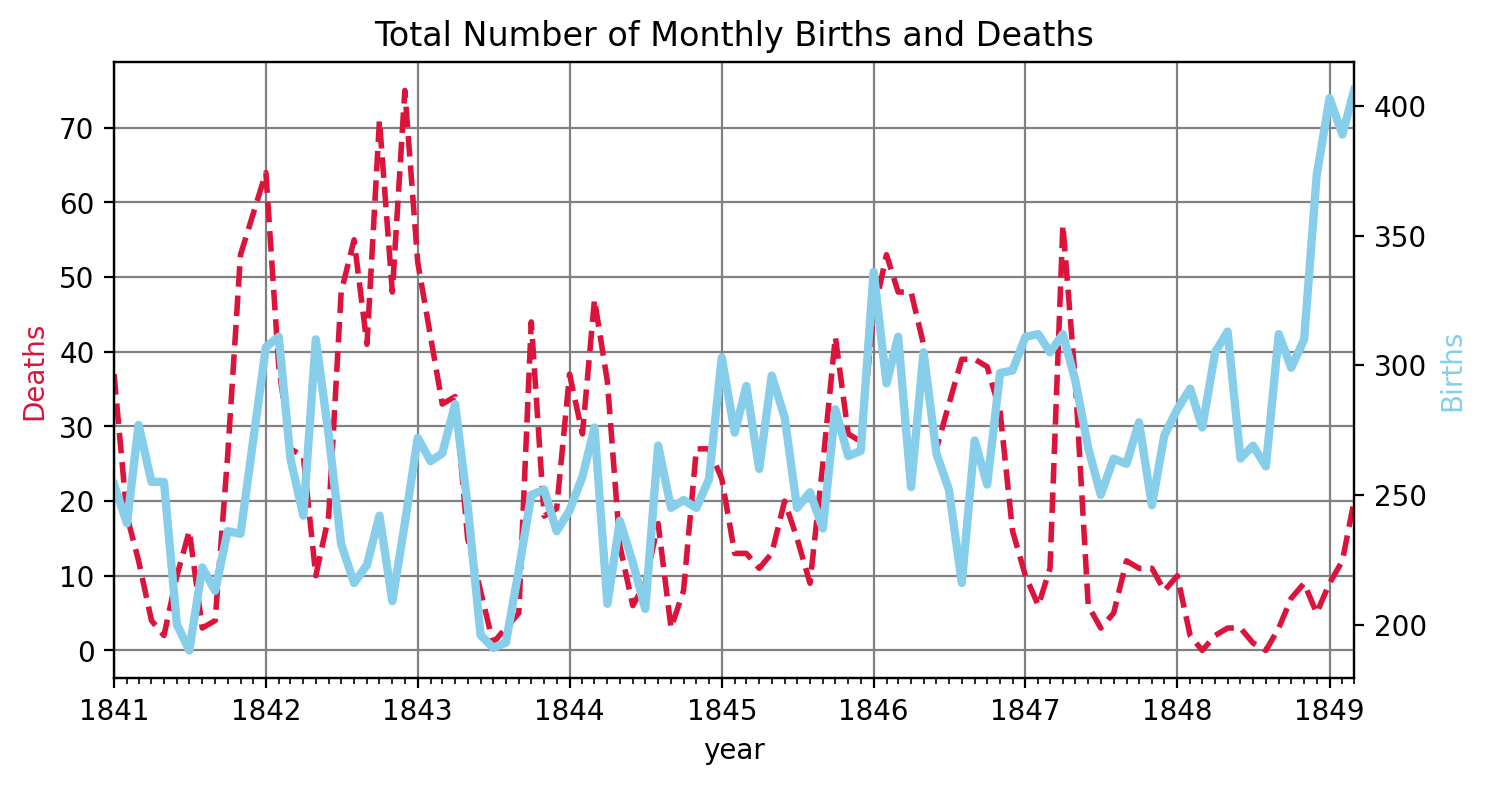

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
plt.title("Total Number of Monthly Births and Deaths")
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.grid(color='grey', linestyle="-")
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.set_ylabel("Deaths", color="crimson")
ax1.set_xlabel("year")
ax2.set_ylabel("Births", color="skyblue")
ax1.set_xlim(df_monthly.date.min(), df_monthly.date.max())
ax1.plot(df_monthly.date, df_monthly.deaths, color="crimson", linestyle='dashed', linewidth=2)
ax2.plot(df_monthly.date, df_monthly.births, color="skyblue", linewidth=3)

# The Yearly Data Split by Clinic


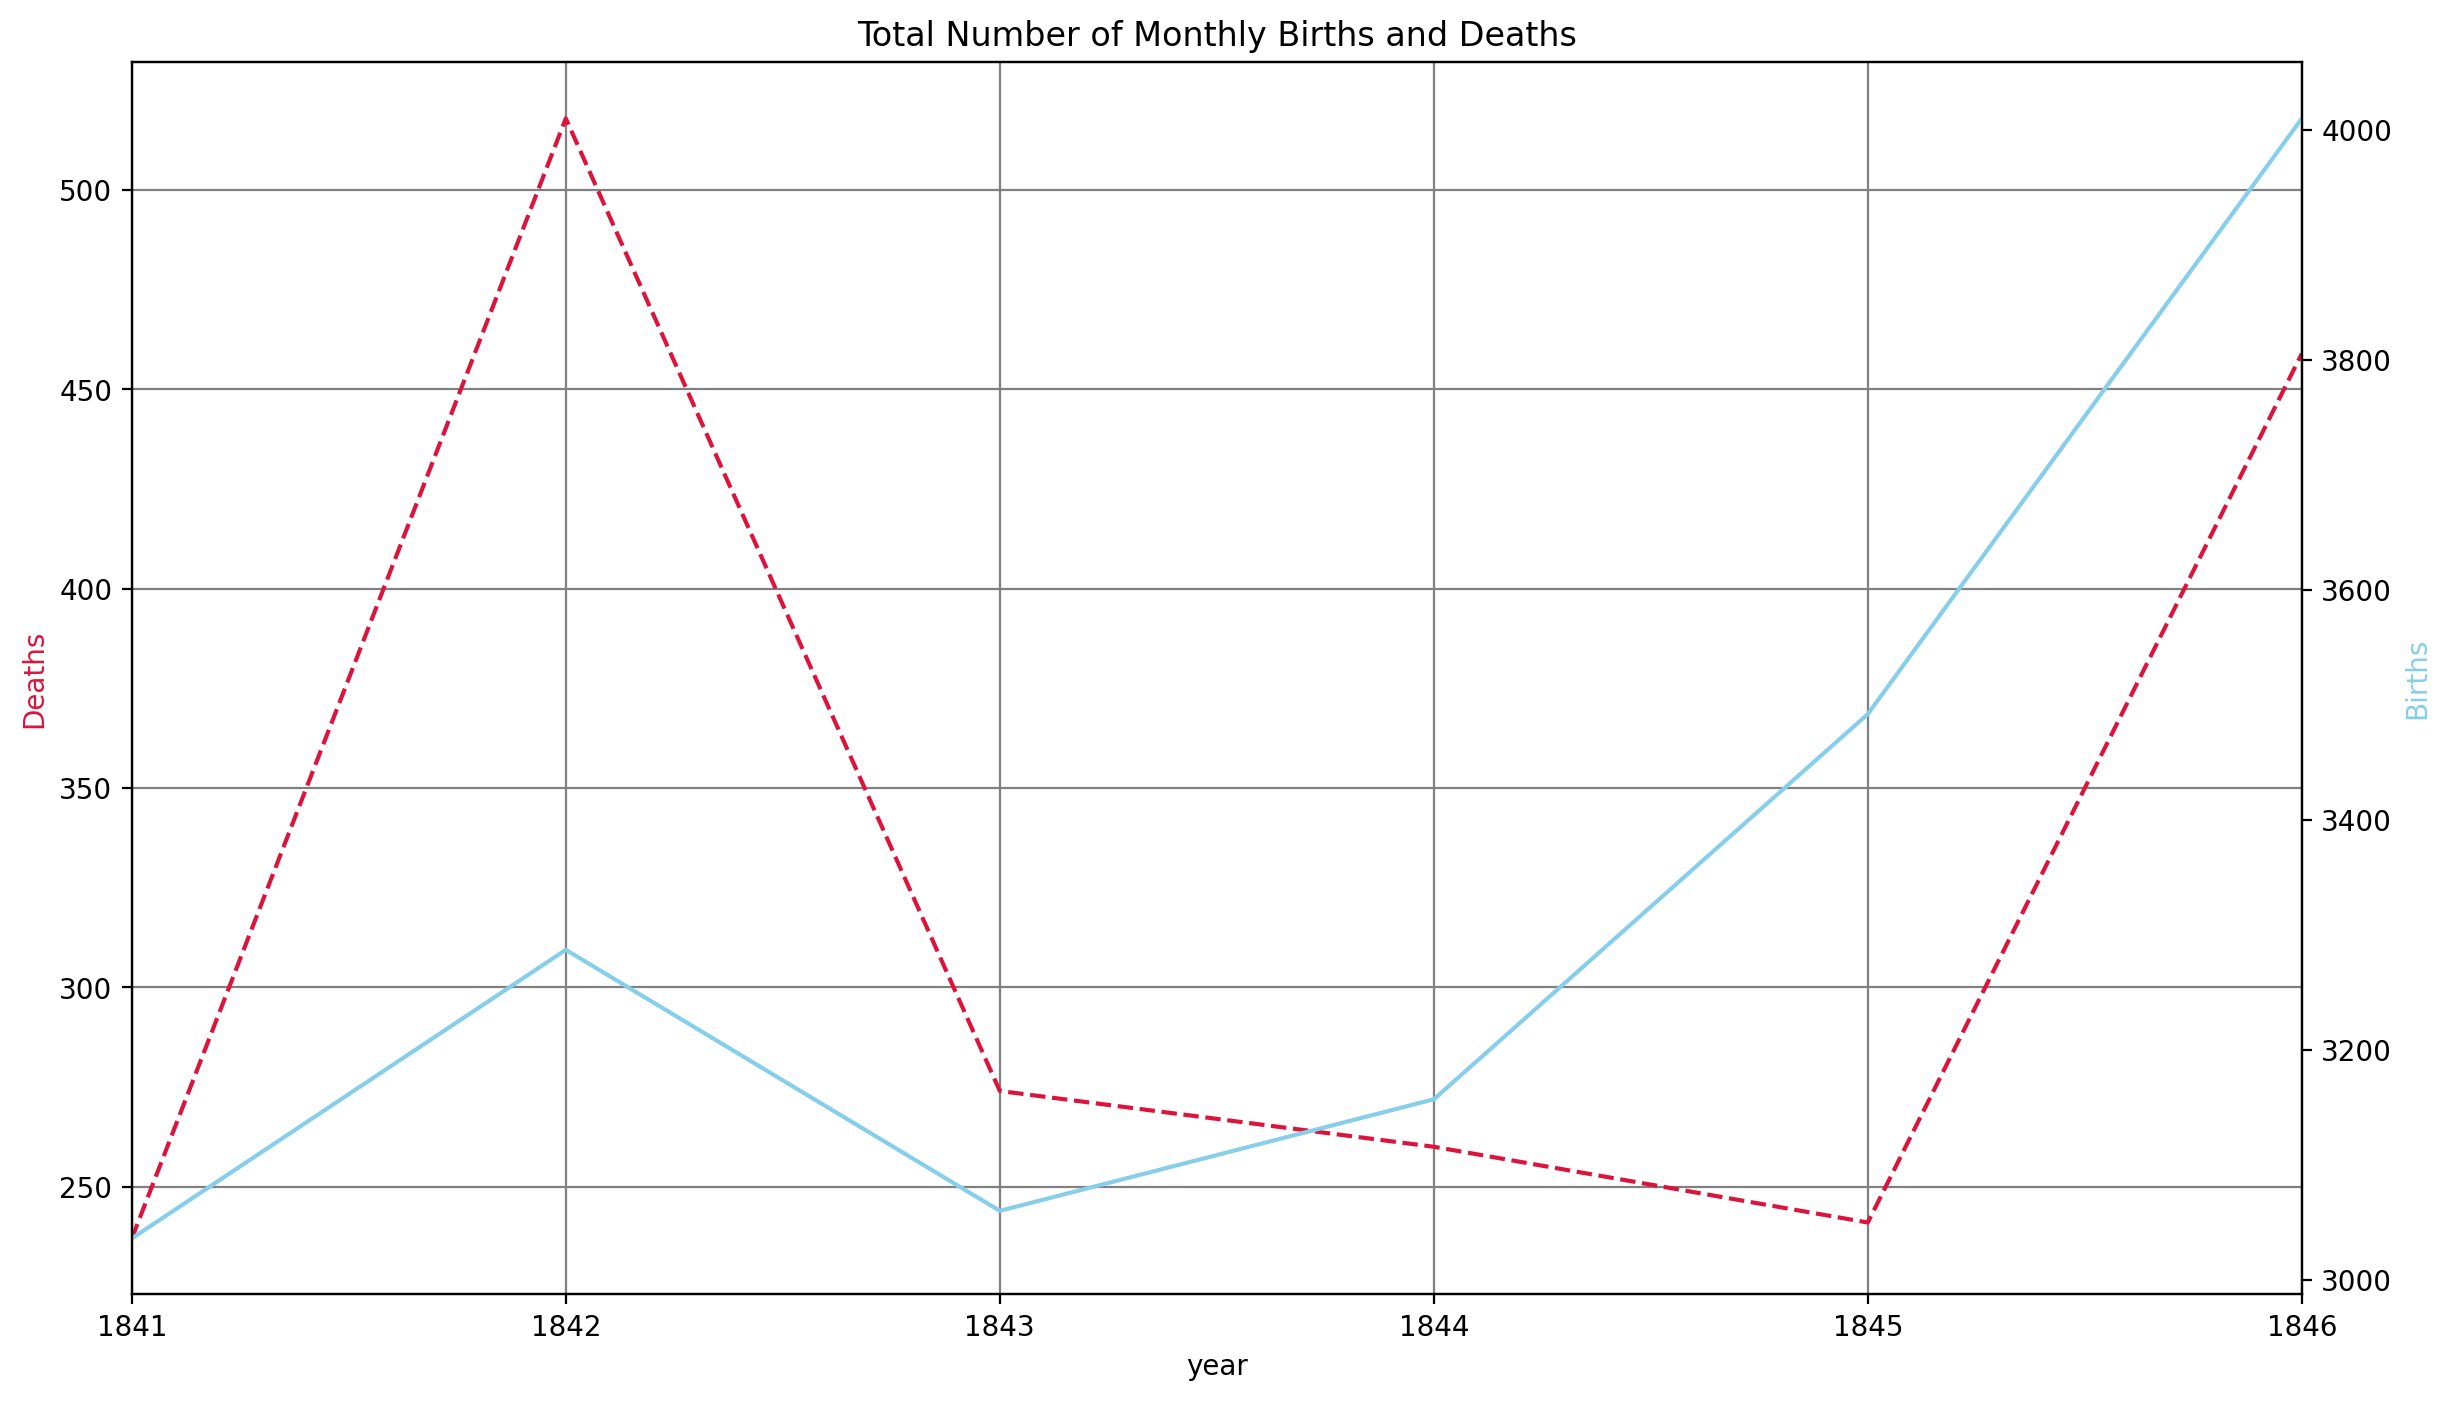

In [ ]:
clinic1 = df_yearly[df_yearly.clinic == "clinic 1"]
plt.figure(figsize=(14,8), dpi=200)
plt.title("Total Number of Monthly Births and Deaths")
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.grid(color='grey', linestyle="-")
ax1.set_ylabel("Deaths", color="crimson")
ax1.set_xlabel("year")
ax2.set_ylabel("Births", color="skyblue")
ax1.set_xlim(clinic1.year.min(), clinic1.year.max())
ax1.plot(clinic1.year, clinic1.deaths, color="crimson", linestyle='dashed')
ax2.plot(clinic1.year, clinic1.births, color="skyblue")

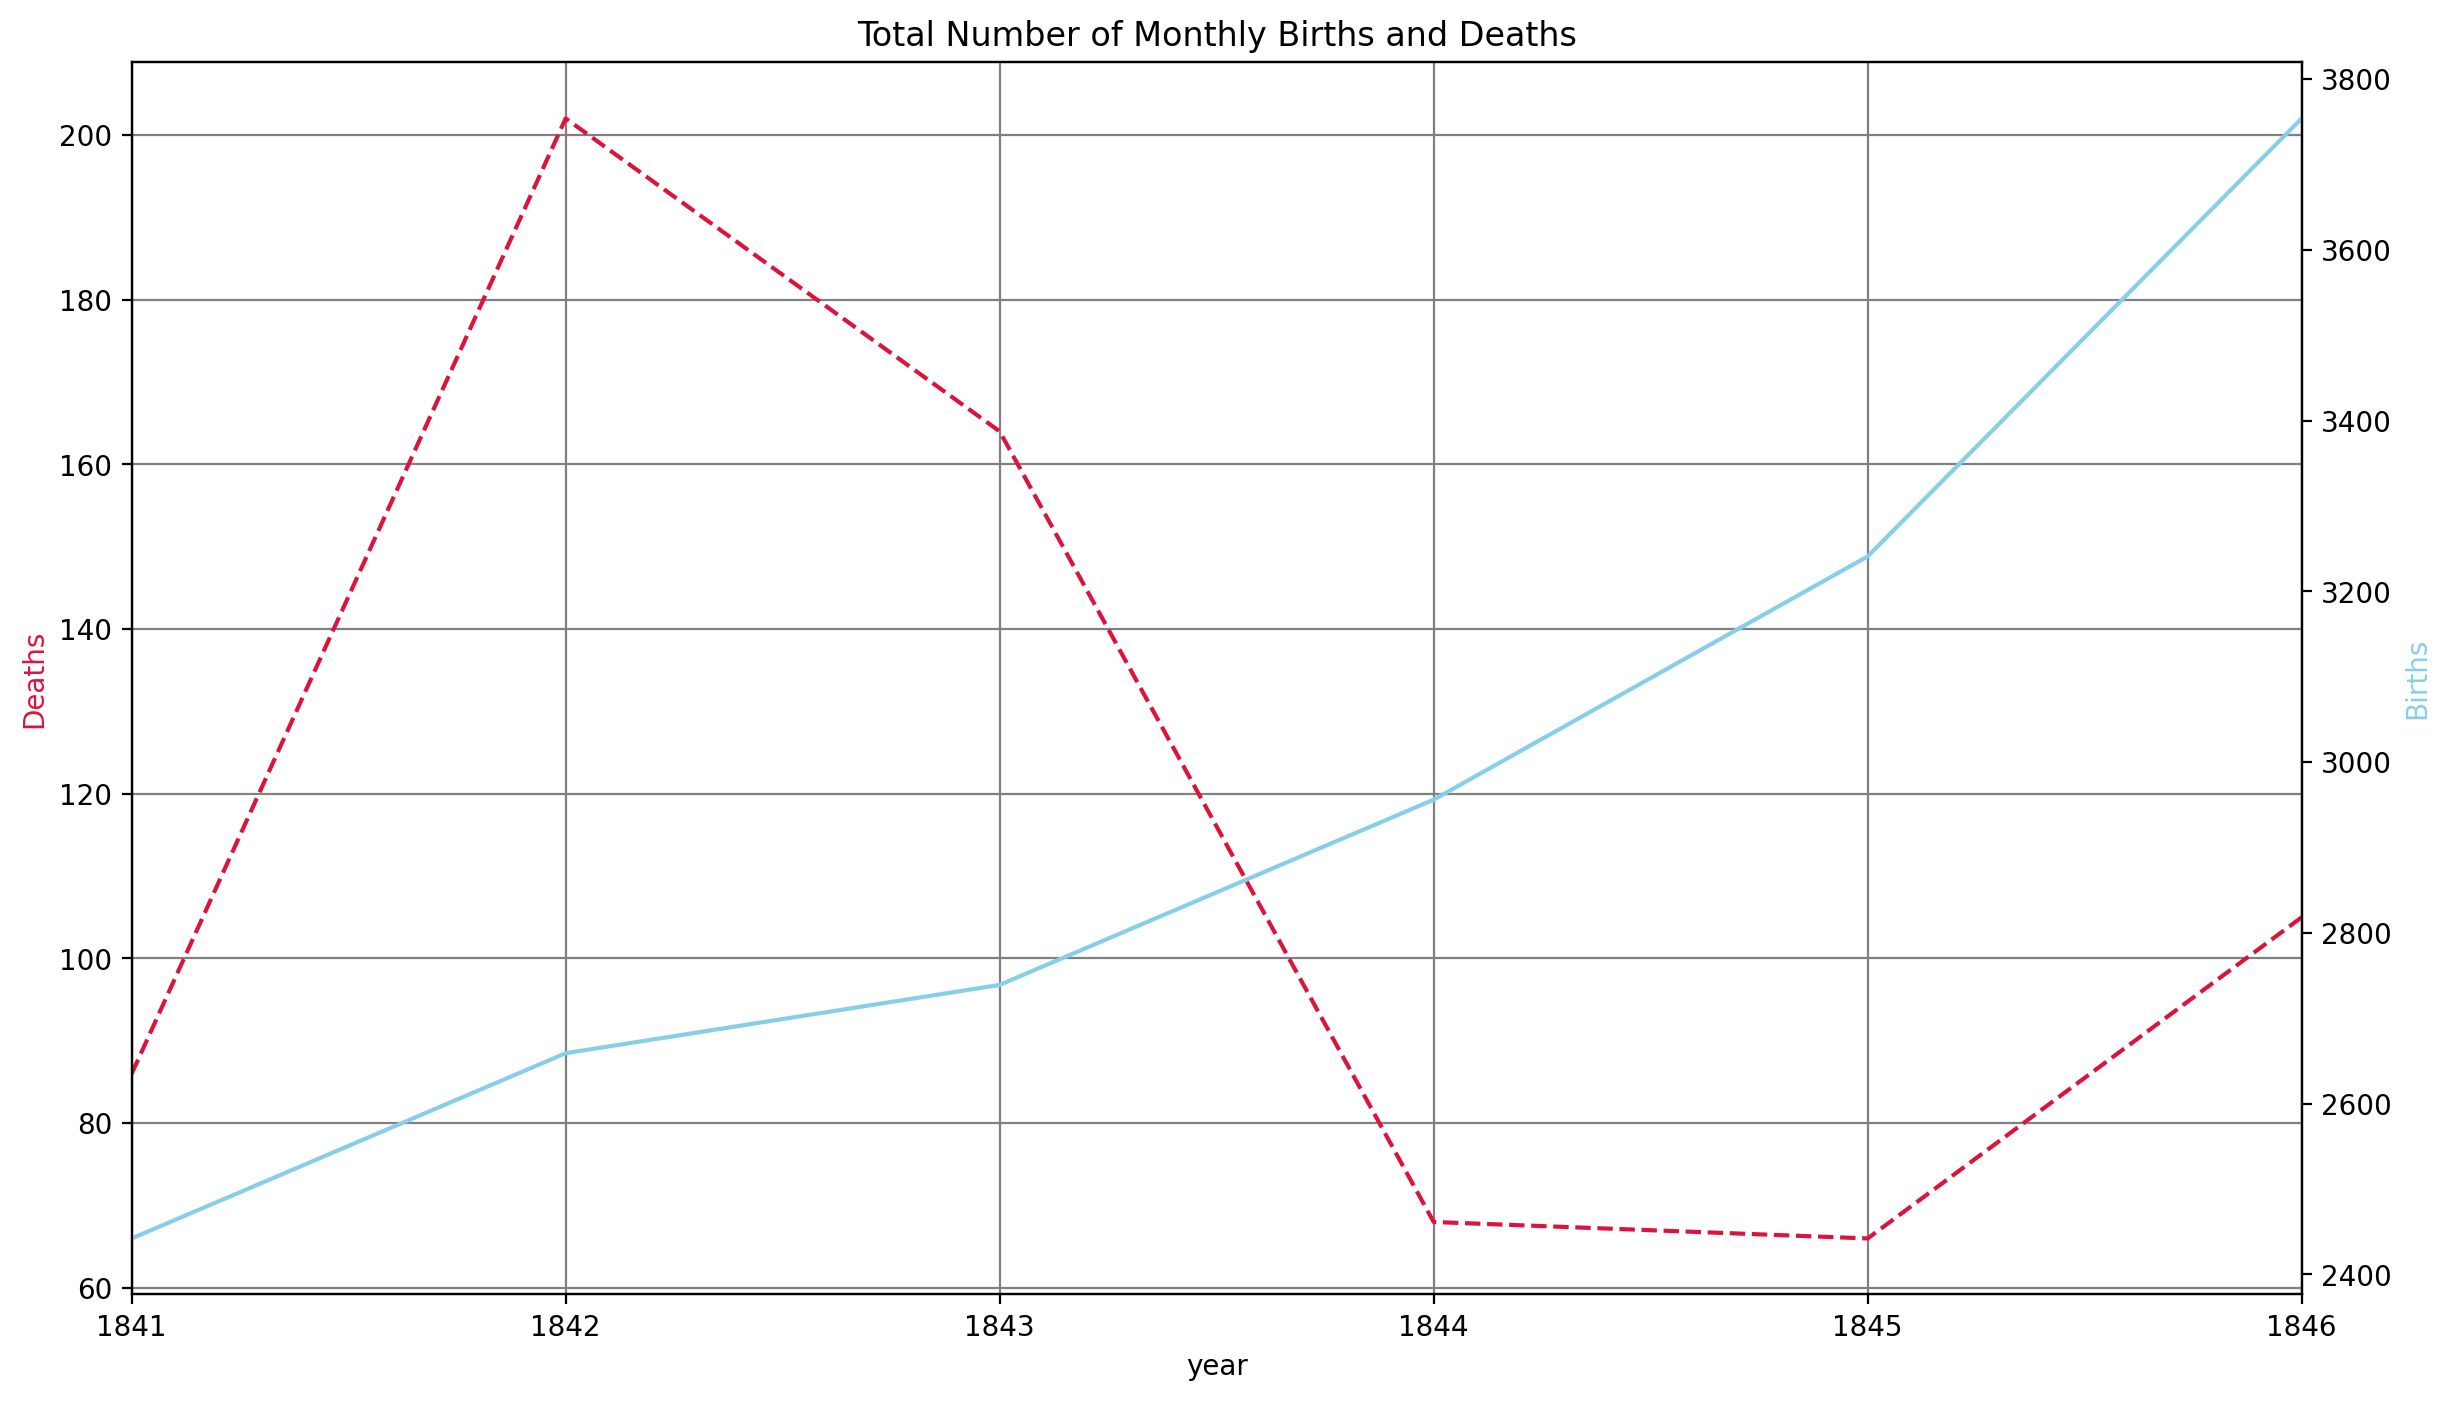

In [ ]:
clinic2 = df_yearly[df_yearly.clinic == "clinic 2"]
plt.figure(figsize=(14,8), dpi=200)
plt.title("Total Number of Monthly Births and Deaths")
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.grid(color='grey', linestyle="-")
ax1.set_ylabel("Deaths", color="crimson")
ax1.set_xlabel("year")
ax2.set_ylabel("Births", color="skyblue")
ax1.set_xlim(clinic2.year.min(), clinic2.year.max())
ax1.plot(clinic2.year, clinic2.deaths, color="crimson", linestyle='dashed')
ax2.plot(clinic2.year, clinic2.births, color="skyblue")

In [ ]:
px.line(df_yearly, x='year', y='births', color='clinic')

In [ ]:
px.line(df_yearly, x='year', y='deaths', color='clinic')

### the Proportion of Deaths at Each Clinic

In [ ]:
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births * 100

In [ ]:
maternal_death_rate1 = clinic1.deaths.sum() / clinic1.births.sum() *100
maternal_death_rate2=  clinic2.deaths.sum() / clinic2.births.sum() *100
print(maternal_death_rate1,maternal_death_rate2)

9.924159265542361 3.8839862852003826


In [ ]:
px.line(df_yearly , x='year', y='pct_deaths', color='clinic')

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [ ]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

We calculate the percentage of deaths per birth (`pct_deaths`) and compare the average monthly mortality rates before and after June 1847, when handwashing was introduced.


In [ ]:
df_monthly["pct_deaths"] = df_monthly.deaths / df_monthly.births *100

In [ ]:
df_monthly

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,14.57
1,1841-02-01,239,18,7.53
2,1841-03-01,277,12,4.33
3,1841-04-01,255,4,1.57
4,1841-05-01,255,2,0.78
...,...,...,...,...
93,1848-11-01,310,9,2.90
94,1848-12-01,373,5,1.34
95,1849-01-01,403,9,2.23
96,1849-02-01,389,12,3.08


In [ ]:
descovery_date = pd.Timestamp('1847-06-01')

In [ ]:
before = df_monthly[df_monthly.date <= descovery_date]
after = df_monthly[df_monthly.date > descovery_date]

In [ ]:
bw_rate = before.deaths.sum() / before.births.sum() *100

In [ ]:
aw_rate = after.deaths.sum() / after.births.sum() *100

In [ ]:
print(f'Average death rate before 1847 was {bw_rate:.4}%')
print(f'Average death rate AFTER 1847 was {aw_rate:.3}%')

Average death rate before 1847 was 10.41%
Average death rate AFTER 1847 was 2.15%


### Rolling Average of the Death Rate

In [ ]:
before

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,14.57
1,1841-02-01,239,18,7.53
2,1841-03-01,277,12,4.33
3,1841-04-01,255,4,1.57
4,1841-05-01,255,2,0.78
...,...,...,...,...
72,1847-02-01,312,6,1.92
73,1847-03-01,305,11,3.61
74,1847-04-01,312,57,18.27
75,1847-05-01,294,36,12.24


In [ ]:
rolling_before= before.rolling(window=6).mean()

DataError: Cannot aggregate non-numeric type: datetime64[ns]

## Visualizing Monthly Death Rates
Plot monthly death rates with separate lines for:
- Before handwashing (dashed black)
- 6-month moving average (thick crimson)
- After handwashing (skyblue with markers)


In [ ]:
plt.figure(figsize=(14,8), dpi=200)
plt.title("Monthly Dead Rates")
ax= plt.gca()
ax.grid(color='grey', linestyle="-")
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(years_fmt)
ax.set_ylabel("Percentages of Deaths", color="crimson")
ral, = plt.plot(before.index, rolling_before.pct_deaths, color="crimson", linestyle="--", linewidth=3, label='6M Moving Average')
bl, = plt.plot(before.index, before.pct_deaths, color="black", linestyle='dashed', linewidth=1, label='Before Handwashing')
al, = plt.plot(after.date, after.pct_deaths, color="skyblue", linewidth=3, marker="o", label='After Handwashing')
plt.legend(handles=[ral,bl,al])

### the Difference in the Average Monthly Death Rate


In [ ]:
b_per = before.pct_deaths.mean()

In [ ]:
a_per = after.pct_deaths.mean()

In [ ]:
diff_b_a = b_per - a_per
diff_b_a

np.float64(8.29447276933218)

In [ ]:
times = b_per / a_per
times

np.float64(4.943791287135589)

### Box Plots to Show How the Death Rate Changed Before and After Handwashing

In [ ]:
df_monthly["handwashing"] = np.where(df_monthly.date <= descovery_date,'before','after')

In [ ]:
box = px.box(df_monthly, x='handwashing', y='pct_deaths', color='handwashing')
box.update_layout(yaxis_title= "Death percentages", xaxis_title='Washing Hands?')

### Histograms to Visualise the Monthly Distribution of Outcomes

In [ ]:
histogram_handwashing = px.histogram(df_monthly,
                                     x='pct_deaths',
                                     opacity=0.5 ,
                                     color='handwashing',
                                     barmode= 'overlay',
                                     histnorm="percent",
                                     nbins=30,
                                     marginal='box',)

In [ ]:
histogram_handwashing

### Kernel Density Estimate (KDE) to visualise a smooth distribution



(0.0, 50.0)

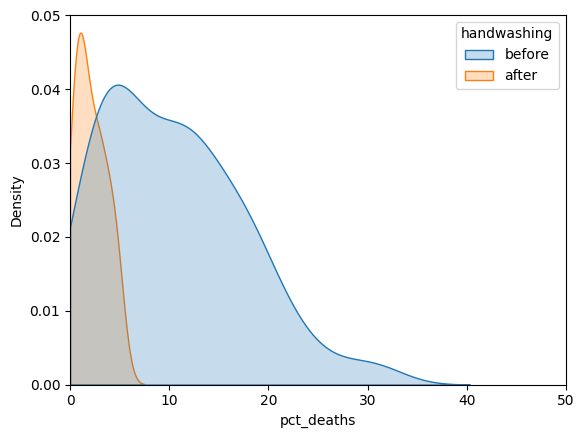

In [ ]:
sns.kdeplot(df_monthly, x='pct_deaths',hue="handwashing", fill=True, multiple="layer", clip=(0,100))
plt.xlim(0,50)

### T-Test to Show Statistical Significance




In [ ]:
t_stat,p_value = stats.ttest_ind(a=before.pct_deaths, b=after.pct_deaths)

In [ ]:
print(p_value,t_stat)

7.131547432636908e-07 5.307992887371079
